In [1]:
from numpy import nan
import matplotlib.pyplot as plt
from IPython.display import clear_output
from CNNOptimizer import CNNOptimizer

# Utility functions

In [2]:
def iter_print(x, history):
    clear_output(wait=True)
    title = (f'J={history["Objective"][-1]:0.3f}     '
             f'V={history["Volume"][-1]:0.3f}     '
             f'G={history["Gray"][-1]:0.3f}')
    plt.imshow(x, origin='lower', cmap='Greys', vmin=0, vmax=1, interpolation='nearest')
    plt.title(title)
    plt.tick_params(axis='both', which='both', colors='w')
    plt.show()

In [3]:
def optimize(opt):
    print(f'Optimization started.')
    x, time = opt.optimize(iter_print)
    print(f'Optimization finished in {time:0.2f} seconds.\n')

# Non-design regions

In [4]:
bc = [{'S': (0, 0), 'E': (0, 1), 'D': (0, 0), 'F': 0},
      {'S': (1, 0.5), 'E': (1, 0.5), 'D': (nan, nan), 'F': lambda x, y: (0, -1)}]
options = {
    'use_gpu': True,
    'mesh_size': (256, 128),
    'volume_fraction': 0.50,
    'symmetry_axis': None,
    'alpha_increase': 1,
    'penalty': 2, 'penalty_increase': 0.05,
    'learning_rate': 1.5E-4,
    'min_it': 25, 'max_it': 500, 'converge_criteria': 0.02
}

## Base mode

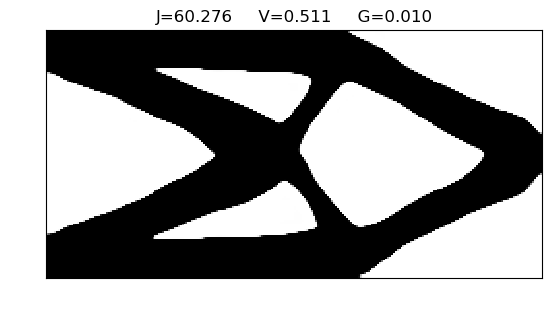

Optimization finished in 117.66 seconds.


In [5]:
optimizer = CNNOptimizer(bc, [], options)
optimize(optimizer)

## Solid non-design region

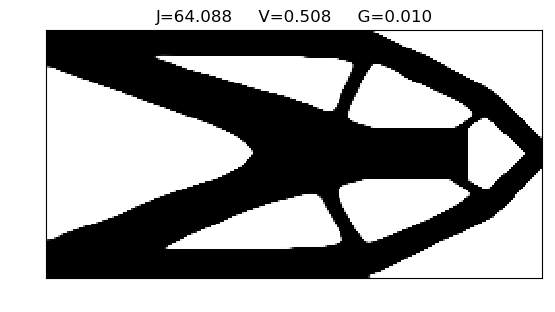

Optimization finished in 109.99 seconds.


In [6]:
frozen = [{'S': (0.5, 0.4), 'E': (0.85, 0.6), 'Material': 'Solid'}]
optimizer = CNNOptimizer(bc, frozen, options)
optimize(optimizer)

## Void non-design region

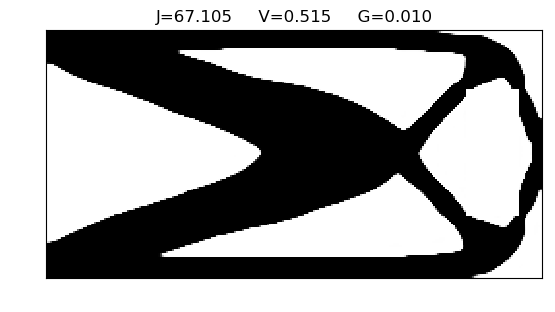

Optimization finished in 96.93 seconds.


In [7]:
frozen = [{'S': (0.85, 0.25), 'E': (0.95, 0.75), 'Material': 'Void'}]
optimizer = CNNOptimizer(bc, frozen, options)
optimize(optimizer)

## Complex mode

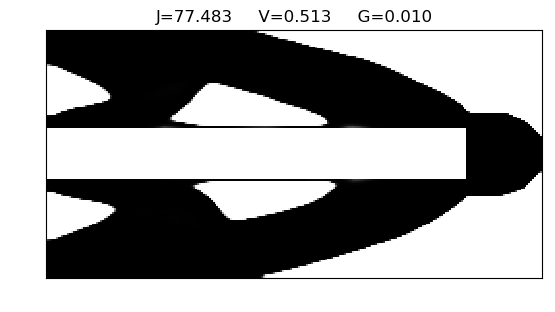

Optimization finished in 77.25 seconds.


In [9]:
frozen = [{'S': (0, 0.4), 'E': (0.85, 0.6), 'Material': 'Void'},
          {'S': (0.85, 0.4), 'E': (0.95, 0.6), 'Material': 'Solid'}]
optimizer = CNNOptimizer(bc, frozen, options)
optimize(optimizer)

# Efficient symmetry constraint

In [10]:
bc = [{'S': (0, 0), 'E': (0, 0), 'D': (nan, 0), 'F': 0},
      {'S': (1, 0), 'E': (1, 0), 'D': (0, 0), 'F': 0},
      {'S': (0.50, 0), 'E': (0.50, 0), 'D': (nan, nan), 'F': lambda x, y: (0, -2)},
      {'S': (0.25, 0), 'E': (0.25, 0), 'D': (nan, nan), 'F': lambda x, y: (0, -1)},
      {'S': (0.75, 0), 'E': (0.75, 0), 'D': (nan, nan), 'F': lambda x, y: (0, -1)}]
options = {
    'use_gpu': True,
    'mesh_size': (256, 128),
    'volume_fraction': 0.40,
    'alpha_increase': 1,
    'penalty': 2, 'penalty_increase': 0.05,
    'learning_rate': 1.5E-4,
    'min_it': 25, 'max_it': 500, 'converge_criteria': 0.02
}

## Without symmetry constraint

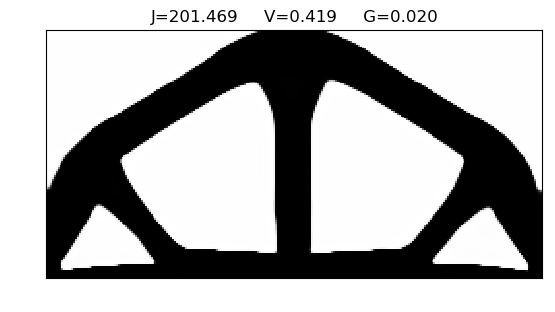

Optimization finished in 47.82 seconds.


In [11]:
options['symmetry_axis'] = None
optimizer = CNNOptimizer(bc, [], options)
optimize(optimizer)

## With symmetry constraint

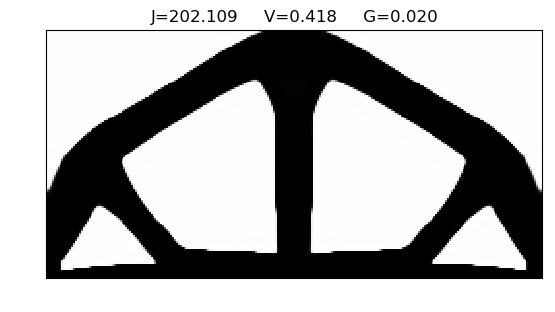

Optimization finished in 20.35 seconds.


In [12]:
options['symmetry_axis'] = 'Y'
optimizer = CNNOptimizer(bc, [], options)
optimize(optimizer)